# NFL Elimination Picks

In [1]:
import datetime
import math
import random

import matplotlib.pyplot as plt
import numpy as np

In [2]:
#%load_ext autoreload
#%autoreload 2

In [3]:
import anysunday
import anysunday.powercalcs
from anysunday import viz, pick

In [4]:
schedule = anysunday.loaders.espn_schedule("./schedules/2021.espn")

https://www.espn.com/nfl/fpi

In [5]:
powers = anysunday.loaders.espn_powers()
powers

{'BUF': 9.1,
 'TB': 6.8,
 'LAR': 6.0,
 'ARI': 5.9,
 'KC': 4.6,
 'BAL': 4.4,
 'DAL': 4.1,
 'NO': 2.7,
 'GB': 2.6,
 'MIN': 2.1,
 'SF': 2.0,
 'LAC': 1.6,
 'CLE': 1.2,
 'SEA': 0.6,
 'IND': 0.6,
 'TEN': 0.2,
 'DEN': 0.0,
 'NE': -0.4,
 'PIT': -0.4,
 'CIN': -0.5,
 'CAR': -0.8,
 'LV': -0.9,
 'PHI': -2.2,
 'CHI': -2.3,
 'WSH': -3.3,
 'MIA': -3.8,
 'ATL': -4.1,
 'NYG': -4.8,
 'DET': -6.4,
 'JAX': -7.5,
 'NYJ': -7.9,
 'HOU': -9.0}

In [6]:
top_picks = list(powers)[:len(schedule)]
best_pick = None
best_pick_fitness = -100

def fitness(scores):
    return 100 * min(scores) + sum(scores)

def fitness(scores):
    return 50 * (min(scores) - 3) + sum(scores)

picks = []

HOME_POWER_BUMP = 3.0

for n in range(100_000):
    this_pick = top_picks[:]
    random.shuffle(this_pick)
    try:
        scores = anysunday.powercalcs.pick_power_calculator(powers, schedule, this_pick)
    except ValueError:
        continue
    
    pick_fitness = fitness(scores)
    
    if pick_fitness < 0:
        continue

    picks.append([min(scores), sum(scores)])
    
    if pick_fitness < best_pick_fitness:
        continue
    
    print("new high score, round {:>9d}, fitness={:+3.1f}".format(n, pick_fitness))
    best_pick = this_pick
    best_scores = scores
    best_pick_fitness = pick_fitness


new high score, round     32299, fitness=+59.7


In [7]:
anysunday.powercalcs.pick_power_calculator(powers, schedule, best_pick, verbose=True)

week  1: diff  +2.7 - picking ARI (+5.9  ) over TEN (+0.2+H)
week  2: diff +12.0 - picking GB  (+2.6+H) over DET (-6.4  )
week  3: diff  +6.5 - picking CLE (+1.2+H) over CHI (-2.3  )
week  4: diff +10.5 - picking NO  (+2.7+H) over NYG (-4.8  )
week  5: diff +13.6 - picking TB  (+6.8+H) over MIA (-3.8  )
week  6: diff  +7.8 - picking LAR (+6.0  ) over NYG (-4.8+H)
week  7: diff +10.5 - picking NE  (-0.4+H) over NYJ (-7.9  )
week  8: diff  +5.0 - picking LAC (+1.6+H) over NE  (-0.4  )
week  9: diff  +7.1 - picking DAL (+4.1+H) over DEN (+0.0  )
week 10: diff  +5.2 - picking DEN (+0.0+H) over PHI (-2.2  )
week 11: diff  +3.7 - picking BAL (+4.4  ) over CHI (-2.3+H)
week 12: diff  +3.4 - picking BUF (+9.1  ) over NO  (+2.7+H)
week 13: diff  +5.5 - picking MIN (+2.1  ) over DET (-6.4+H)
week 14: diff +10.7 - picking TEN (+0.2+H) over JAX (-7.5  )
week 15: diff  +4.0 - picking IND (+0.6+H) over NE  (-0.4  )
week 16: diff  +5.9 - picking SEA (+0.6+H) over CHI (-2.3  )
week 17: diff +14.0 - pi

[2.7,
 12.0,
 6.5,
 10.5,
 13.6,
 7.800000000000001,
 10.5,
 5.0,
 7.1,
 5.2,
 3.7,
 3.3999999999999995,
 5.5,
 10.7,
 4.0,
 5.9,
 14.0,
 1.5999999999999996]

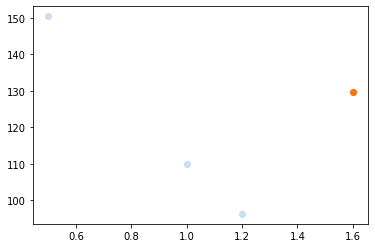

In [8]:
best_scores = anysunday.powercalcs.pick_power_calculator(powers, schedule, best_pick)
best_point = [min(best_scores), sum(best_scores)]

f, ax = plt.subplots()
ax.scatter(*zip(*picks), alpha=0.2)

ax.scatter(*best_point, color="xkcd:orange")

(<Figure size 576x720 with 2 Axes>,
 <AxesSubplot:xlabel='Week', ylabel='Pick to Win'>)

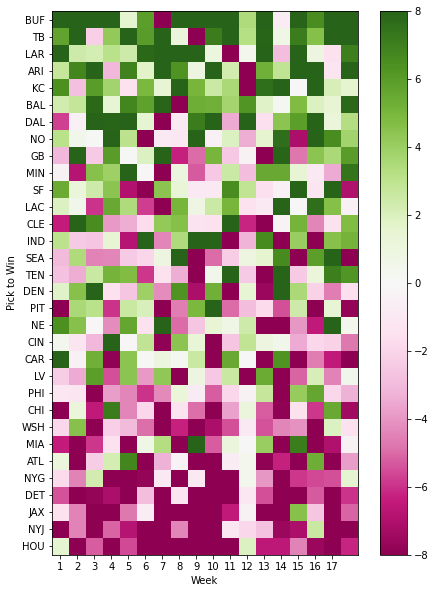

In [9]:
power_rank, matrix = anysunday.powercalcs.pick_grid(powers, schedule, home_bump=3)

viz.plot_matrix(matrix, power_rank)

In [10]:
my_past_picks = [
    "LAR", # week 1
    "NYJ", # week 2 (not a real pick...didn't really pick :/)
    "DEN", # week 3
    "BUF", # week 4
    "MIN", # week 5
    "IND", # week 6
]

tuned_home_bump = 1.5

ppkwargs = {
    "powers": powers,
    "schedule": schedule,
    "home_bump": tuned_home_bump,
    "past_picks": my_past_picks
}

In [11]:
pp = pick.Permuter(**ppkwargs)

pprev = pick.Permuter(**ppkwargs)
pprev.pick = pprev.reverse_greedy()

pprand = pick.Permuter(**ppkwargs)
pprand.pick = pprand.random_greedy()

pplg = pick.Permuter(**ppkwargs)
pplg.pick = pplg.limited_greedy(limit=8)

In [12]:
pp.describe_pick()

week  7: diff +16.4 - picking ARI (+5.9+H) over HOU (-9.0  )
week  8: diff +10.9 - picking KC  (+4.6+H) over NYG (-4.8  )
week  9: diff  +8.3 - picking NO  (+2.7+H) over ATL (-4.1  )
week 10: diff  +9.7 - picking DAL (+4.1+H) over ATL (-4.1  )
week 11: diff +13.1 - picking TB  (+6.8+H) over NYG (-4.8  )
week 12: diff  +4.7 - picking BAL (+4.4+H) over CLE (+1.2  )
week 13: diff  +4.2 - picking PHI (-2.2  ) over NYJ (-7.9+H)
week 14: diff  +9.2 - picking TEN (+0.2+H) over JAX (-7.5  )
week 15: diff  +7.6 - picking SF  (+2.0+H) over ATL (-4.1  )
week 16: diff  +9.1 - picking LAC (+1.6  ) over HOU (-9.0+H)
week 17: diff  +8.6 - picking NE  (-0.4+H) over JAX (-7.5  )
week 18: diff  +7.5 - picking GB  (+2.6  ) over DET (-6.4+H)


In [13]:
pprev.describe_pick()

week  7: diff  +9.0 - picking NE  (-0.4+H) over NYJ (-7.9  )
week  8: diff  +9.6 - picking SEA (+0.6+H) over JAX (-7.5  )
week  9: diff  +8.3 - picking NO  (+2.7+H) over ATL (-4.1  )
week 10: diff  +7.5 - picking PIT (-0.4+H) over DET (-6.4  )
week 11: diff  +9.1 - picking CLE (+1.2+H) over DET (-6.4  )
week 12: diff  +6.5 - picking DAL (+4.1+H) over LV  (-0.9  )
week 13: diff  +6.1 - picking KC  (+4.6+H) over DEN (+0.0  )
week 14: diff  +9.2 - picking TEN (+0.2+H) over JAX (-7.5  )
week 15: diff +10.8 - picking ARI (+5.9  ) over DET (-6.4+H)
week 16: diff  +9.1 - picking LAC (+1.6  ) over HOU (-9.0+H)
week 17: diff +12.5 - picking SF  (+2.0+H) over HOU (-9.0  )
week 18: diff  +9.1 - picking TB  (+6.8+H) over CAR (-0.8  )


In [14]:
pprand.describe_pick()

week  7: diff  +9.0 - picking NE  (-0.4+H) over NYJ (-7.9  )
week  8: diff +10.9 - picking KC  (+4.6+H) over NYG (-4.8  )
week  9: diff  +3.8 - picking BAL (+4.4+H) over MIN (+2.1  )
week 10: diff  +7.5 - picking PIT (-0.4+H) over DET (-6.4  )
week 11: diff +10.7 - picking TEN (+0.2+H) over HOU (-9.0  )
week 12: diff  +6.5 - picking DAL (+4.1+H) over LV  (-0.9  )
week 13: diff  +6.7 - picking ARI (+5.9  ) over CHI (-2.3+H)
week 14: diff  +9.1 - picking NO  (+2.7  ) over NYJ (-7.9+H)
week 15: diff  +5.6 - picking MIA (-3.8+H) over NYJ (-7.9  )
week 16: diff  +9.1 - picking LAC (+1.6  ) over HOU (-9.0+H)
week 17: diff +12.5 - picking SF  (+2.0+H) over HOU (-9.0  )
week 18: diff  +9.1 - picking TB  (+6.8+H) over CAR (-0.8  )


In [15]:
pplg.describe_pick()

week  7: diff  +9.0 - picking NE  (-0.4+H) over NYJ (-7.9  )
week  8: diff  +9.6 - picking SEA (+0.6+H) over JAX (-7.5  )
week  9: diff  +8.3 - picking NO  (+2.7+H) over ATL (-4.1  )
week 10: diff  +8.2 - picking ARI (+5.9+H) over CAR (-0.8  )
week 11: diff  +9.1 - picking CLE (+1.2+H) over DET (-6.4  )
week 12: diff  +6.5 - picking DAL (+4.1+H) over LV  (-0.9  )
week 13: diff  +9.4 - picking TB  (+6.8  ) over ATL (-4.1+H)
week 14: diff  +9.2 - picking TEN (+0.2+H) over JAX (-7.5  )
week 15: diff  +7.6 - picking SF  (+2.0+H) over ATL (-4.1  )
week 16: diff  +9.1 - picking LAC (+1.6  ) over HOU (-9.0+H)
week 17: diff  +4.0 - picking CHI (-2.3+H) over NYG (-4.8  )
week 18: diff  +7.5 - picking GB  (+2.6  ) over DET (-6.4+H)


In [16]:
best_picks = []
best_fitness = -100
for n in range(100_000):
    pprand.pick = pprand.random_greedy()
    
    if pprand.fitness > best_fitness:
        print("new best fitness", int(pprand.fitness))
        best_picks = pprand.pick
        best_fitness = pprand.fitness
        
pprand.pick = best_picks
pprand.describe_pick()

new best fitness 13158
new best fitness 118041
new best fitness 146099
new best fitness 150621
week  7: diff  +9.0 - picking NE  (-0.4+H) over NYJ (-7.9  )
week  8: diff +10.9 - picking KC  (+4.6+H) over NYG (-4.8  )
week  9: diff  +8.3 - picking NO  (+2.7+H) over ATL (-4.1  )
week 10: diff  +7.5 - picking PIT (-0.4+H) over DET (-6.4  )
week 11: diff  +9.1 - picking CLE (+1.2+H) over DET (-6.4  )
week 12: diff  +6.5 - picking DAL (+4.1+H) over LV  (-0.9  )
week 13: diff  +9.4 - picking TB  (+6.8  ) over ATL (-4.1+H)
week 14: diff  +9.2 - picking TEN (+0.2+H) over JAX (-7.5  )
week 15: diff +10.8 - picking ARI (+5.9  ) over DET (-6.4+H)
week 16: diff  +9.1 - picking LAC (+1.6  ) over HOU (-9.0+H)
week 17: diff +12.5 - picking SF  (+2.0+H) over HOU (-9.0  )
week 18: diff  +7.5 - picking GB  (+2.6  ) over DET (-6.4+H)


## FiveThirtyEight Elo Data

* Links
    * https://projects.fivethirtyeight.com/2020-nfl-predictions/
    * https://github.com/fivethirtyeight/data/tree/master/nfl-elo
* Important Fields
    * `team1`	Abbreviation for home team
    * `team2`	Abbreviation for away team
    * `qbelo_prob1`	Home team's probability of winning according to quarterback-adjusted Elo
    * `qbelo_prob2`	Away team's probability of winning according to quarterback-adjusted Elo

In [17]:
data = anysunday.loaders.five38_elos()

In [18]:
data.shape

(272, 33)

In [19]:
data

,date,season,neutral,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,...,qb2_game_value,qb1_value_post,qb2_value_post,qbelo1_post,qbelo2_post,score1,score2,quality,importance,total_rating
0,2021-09-09,2021,0,NaN,TB,DAL,1656.235930,1452.424236,0.824539,0.175461,...,397.401725,223.782352,248.082791,1639.815956,1500.264612,31.0,29.0,85,48,67
1,2021-09-12,2021,0,NaN,HOU,JAX,1432.775542,1339.023563,0.713787,0.286213,...,82.479069,137.164623,109.859329,1391.718434,1350.757949,37.0,21.0,0,17,9
2,2021-09-12,2021,0,NaN,IND,SEA,1561.490084,1565.751134,0.586531,0.413469,...,246.652318,113.888998,192.992819,1500.541394,1580.083300,16.0,28.0,63,73,68
3,2021-09-12,2021,0,NaN,DET,SF,1390.645249,1490.665951,0.449771,0.550229,...,175.216924,171.513676,132.495404,1355.200609,1562.414869,33.0,41.0,23,45,34
4,2021-09-12,2021,0,NaN,TEN,ARI,1553.397217,1486.436956,0.681272,0.318728,...,302.017311,190.370826,225.696909,1489.651053,1528.361042,13.0,38.0,56,59,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,2022-01-09,2021,0,NaN,BUF,NYJ,1672.471071,1337.303835,0.909170,0.090830,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34,7,21
268,2022-01-09,2021,0,NaN,OAK,LAC,1511.783463,1545.926556,0.544290,0.455710,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66,86,76
269,2022-01-09,2021,0,NaN,ARI,SEA,1639.291650,1529.389118,0.732397,0.267603,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85,69,77
270,2022-01-09,2021,0,NaN,DEN,KC,1438.389356,1615.573839,0.343940,0.656060,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68,90,79


In [20]:
import dateutil.parser

NUM_TEAMS = 32
NUM_WEEKS = len(schedule)

WEEK_1_WED = datetime.datetime(year=2021, month=9, day=8)
TEAM_RENAMES = {
    "OAK": "LV",  # Raiders
}

def date_to_week(date):
    if not isinstance(date, datetime.datetime):
        date = dateutil.parser.parse(date)
    day_diff = (date - WEEK_1_WED) / datetime.timedelta(days=1)
    return int((day_diff // 7) + 1)

def pick_grid_538(data):
    powers = {}
    matches = []
    for _index, row in data.iterrows():
        week = date_to_week(row["date"])
        if week > NUM_WEEKS: 
            break
        for n in "12":
            team = row[f"team{n}"]
            elo = row[f"qbelo{n}_post"]
            p_win = row[f"qbelo_prob{n}"]
            if not math.isnan(elo):
                powers[team] = elo
            matches.append((team, week, p_win))

    index = sorted(powers, key=lambda t: powers[t])
    matrix = [[-10] * NUM_TEAMS for _ in range(NUM_WEEKS)]
    for team, week, p_win in matches:
        matrix[week - 1][index.index(team)] = 20 * (p_win - 0.5)
    
    # 538 uses old names as they have historical(ish) data
    index = [TEAM_RENAMES.get(n, n) for n in index]
    return index, matrix

(<Figure size 576x720 with 2 Axes>,
 <AxesSubplot:xlabel='Week', ylabel='Pick to Win'>)

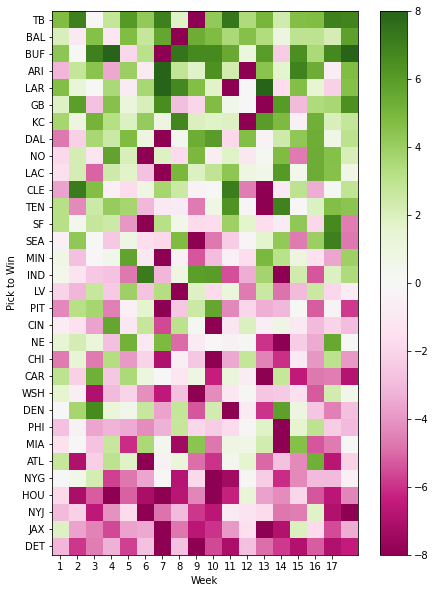

In [21]:
index538, matrix538 = pick_grid_538(data)
viz.plot_matrix(matrix538, index538)

In [22]:
class ProbPickPermuter(pick.Permuter):
    def __init__(self, df, past_picks=None):
        self.past_picks = past_picks or []
        self.n_weeks = NUM_WEEKS

        self.df = df.copy()
        self.df["week"] = self.df["date"].apply(date_to_week)
        
        # ignore postseason games
        self.df = self.df[self.df["week"] <= NUM_WEEKS]
    
        self.grid_index, self.grid = pick_grid_538(self.df)
        
        self.pick = self.greedy()
        
    @property
    def pick_score(self):
        scores = []
        for week in range(NUM_WEEKS):
            pick = self.pick[week]
            pick_index = self.grid_index.index(pick)
            scores.append(self.grid[week][pick_index])
        return scores

In [23]:
ppp = ProbPickPermuter(data, past_picks=my_past_picks)
ppp.pick = ppp.greedy()
ppp.fitness

193723.16515034513

In [24]:
ppp = ProbPickPermuter(data, past_picks=my_past_picks)

best_538_picks = []
best_538_fitness = -100
for n in range(100_000):
    ppp.pick = ppp.random_greedy()
    
    if ppp.fitness > best_538_fitness:
        print("new best fitness", int(ppp.fitness))
        best_538_picks = ppp.pick
        print(" ".join(format(p, ">3s") for p in best_538_picks))
        best_538_fitness = ppp.fitness
        
ppp.pick = best_538_picks
ppp.pick 

new best fitness 218341
LAR NYJ DEN BUF MIN IND  GB LAC DAL PIT  TB BAL  KC TEN ARI  NO SEA CLE
new best fitness 337032
LAR NYJ DEN BUF MIN IND  NE LAC BAL PIT  TB DAL  KC TEN ARI  NO SEA  GB
new best fitness 337795
LAR NYJ DEN BUF MIN IND  TB LAC DAL PIT CLE BAL  KC TEN ARI  NO SEA  GB
new best fitness 337829
LAR NYJ DEN BUF MIN IND  GB LAC DAL PIT CLE BAL  KC TEN ARI  NO SEA  TB
new best fitness 343330
LAR NYJ DEN BUF MIN IND  GB LAC BAL PIT CLE DAL  KC TEN ARI  NO SEA  TB


['LAR',
 'NYJ',
 'DEN',
 'BUF',
 'MIN',
 'IND',
 'GB',
 'LAC',
 'BAL',
 'PIT',
 'CLE',
 'DAL',
 'KC',
 'TEN',
 'ARI',
 'NO',
 'SEA',
 'TB']

In [25]:
print(" ".join(format(p, ">3s") for p in pprand.pick))
print(" ".join(format(p, ">3s") for p in best_538_picks))

LAR NYJ DEN BUF MIN IND  NE  KC  NO PIT CLE DAL  TB TEN ARI LAC  SF  GB
LAR NYJ DEN BUF MIN IND  GB LAC BAL PIT CLE DAL  KC TEN ARI  NO SEA  TB
